In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
#查看資料總筆數與多少變數
df.shape

(10000, 14)

In [4]:
#檢查是否有缺失的資料
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#查看每個column的data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#查看每個column有幾個不同的值
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df_new = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [8]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

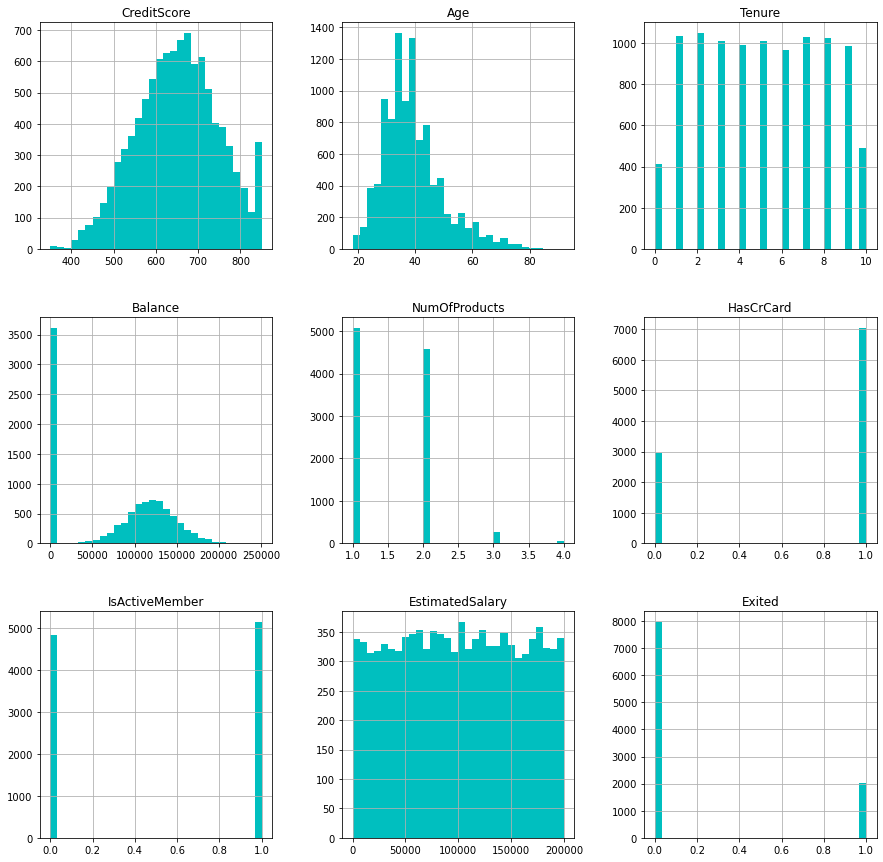

In [9]:
df_new.hist(figsize=(15, 15), bins=30, color="c")

從相關係數來看，年齡越高的顧客，越有可能取消服務

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

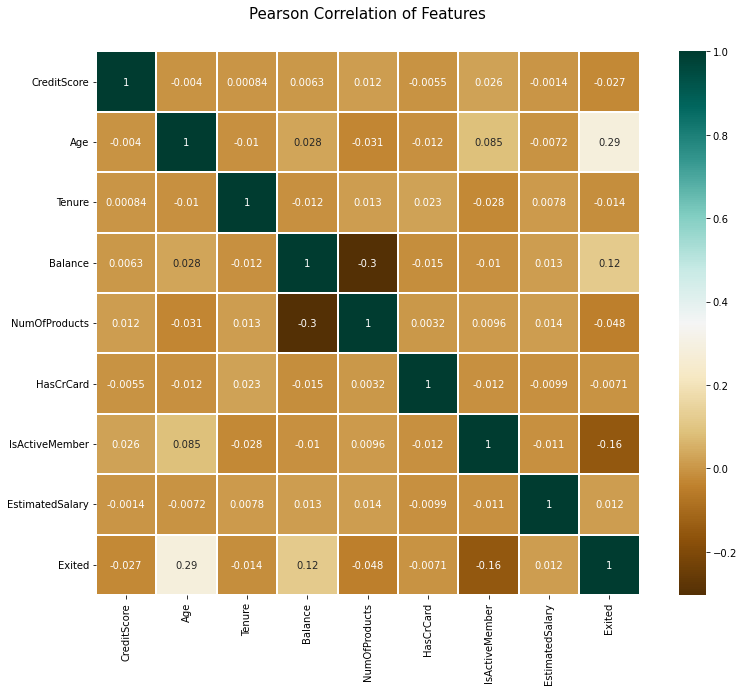

In [10]:
plt.figure(figsize=(14, 10))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(df_new.corr(), cmap = "BrBG", linewidths=0.1, square=True, linecolor='white', annot=True)

In [25]:
df_new.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


將資料依照顧客是否取消服務來分成兩群，分別對這兩群資料，用每個變數來觀察一遍

In [11]:
df_exit_1 = df_new[df["Exited"]==1]
df_exit_0 = df_new[df["Exited"]==0]

使用信用分數與取消服務的顧客進行分析，觀察取消服務的顧客是否與信用分數有關

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

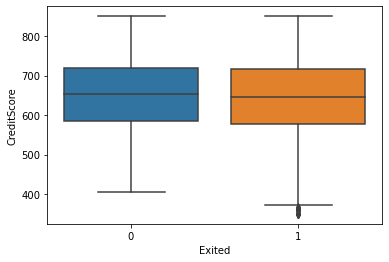

In [12]:
sns.boxplot(x="Exited", y="CreditScore", data=df_new)

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

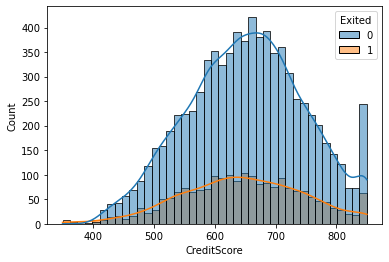

In [13]:
# sns.histplot(x="CreditScore", hue="Exited", data=df_new, kde=True, cbar_kws=dict(edgecolor='white', linewidth=2))

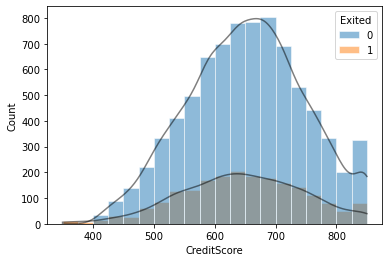

In [249]:
ax_credit = sns.histplot(x="CreditScore", hue="Exited", data=df_new, bins=20, kde=True, alpha=0.5, edgecolor='white', linewidth=0.5,
             line_kws=dict(color='black', alpha=0.5, linewidth=1.5))

ax_credit.get_lines()[0].set_color('black')
ax_credit.get_lines()[1].set_color('black')

In [250]:
for p in ax_credit.patches:
    print(p.get_x(), p.get_height())

350.0 12
375.0 7
400.0 13
425.0 29
450.0 27
475.0 62
500.0 85
525.0 126
550.0 130
575.0 169
600.0 184
625.0 205
650.0 186
675.0 178
700.0 159
725.0 144
750.0 112
775.0 81
800.0 48
825.0 80
350.0 0
375.0 0
400.0 34
425.0 90
450.0 139
475.0 219
500.0 334
525.0 413
550.0 498
575.0 647
600.0 697
625.0 780
650.0 783
675.0 805
700.0 692
725.0 530
750.0 442
775.0 333
800.0 203
825.0 324


Geography

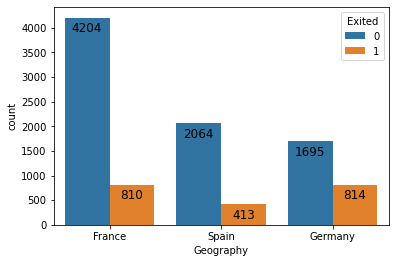

In [127]:
ax_geo = sns.countplot(x="Geography", hue="Exited", data=df_new)

for p in ax_geo.patches:
        ax_geo.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()+220), ha='center', va='top', color='black', size=12)

In [251]:
df_new["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [252]:
df_new["Geography"].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [138]:
df_new.groupby(["Geography"])["Exited"].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [234]:
df_new.groupby(["Geography"])["Exited"].value_counts(normalize=True)

Geography  Exited
France     0         0.838452
           1         0.161548
Germany    0         0.675568
           1         0.324432
Spain      0         0.833266
           1         0.166734
Name: Exited, dtype: float64

國籍為德國的顧客，佔整體顧客比例最低，但取消服務的比例是最高的，取消服務的總數量也是最高的

Gender

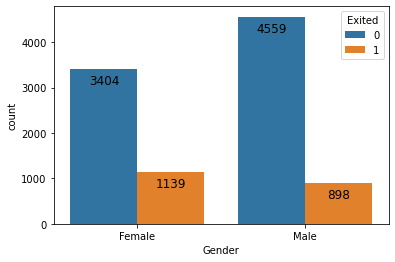

In [157]:
ax_sex = sns.countplot(x="Gender", hue="Exited", data=df_new)

for p in ax_sex.patches:
        ax_sex.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()+220), ha='center', va='top', color='black', size=12)

In [253]:
df_new["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

女性取消服務的比例偏高，約25%，男性則為16.5%

In [148]:
df_new.groupby(["Gender"])["Exited"].mean()


Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

Age

<AxesSubplot:xlabel='Exited', ylabel='Age'>

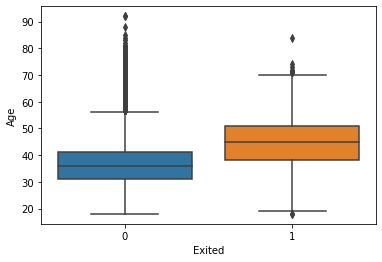

In [30]:
sns.boxplot(x="Exited", y="Age", data=df_new)

In [263]:
bins = [18, 27, 36, 45, 54, 63, 72, 81, 92]

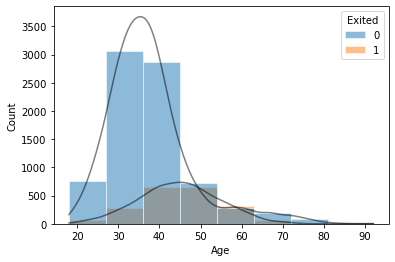

In [265]:
ax = sns.histplot(x="Age", hue="Exited", data=df_new, bins=bins, kde=True, alpha=0.5, edgecolor='white', linewidth=0.5,
             line_kws=dict(color='black', alpha=0.5, linewidth=1.5))

ax.get_lines()[0].set_color('black')
ax.get_lines()[1].set_color('black')

In [266]:
age_range = {}
for p in ax.patches:
    print(p.get_x(), p.get_height())



18.0 60
27.0 287
36.0 646
45.0 651
54.0 320
63.0 69
72.0 3
81.0 1
18.0 751
27.0 3055
36.0 2861
45.0 723
54.0 287
63.0 184
72.0 91
81.0 11


In [273]:
df_new[(df_new.Age < 45)]["Exited"].value_counts()

0    6667
1     993
Name: Exited, dtype: int64

In [274]:
df_new[(df_new.Age < 45)]["Exited"].value_counts(normalize=True)

0    0.870366
1    0.129634
Name: Exited, dtype: float64

從histogram分布來看，45歲到53歲以及54到62歲的民眾取消服務的傾向更高

In [275]:
df_new[(df_new.Age >=45) & (df_new.Age < 63)]["Exited"].value_counts()

0    1010
1     971
Name: Exited, dtype: int64

In [276]:
df_new[(df_new.Age >=45) & (df_new.Age < 63)]["Exited"].value_counts(normalize=True)

0    0.509844
1    0.490156
Name: Exited, dtype: float64

In [277]:
df_new[(df_new.Age >=63)]["Exited"].value_counts()

0    286
1     73
Name: Exited, dtype: int64

In [268]:
df_new[(df_new.Age >=63)]["Exited"].value_counts(normalize=True)

0    0.796657
1    0.203343
Name: Exited, dtype: float64

Tenure

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

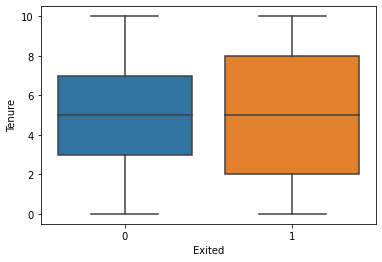

In [107]:
sns.boxplot(x="Exited", y="Tenure", data=df_new)

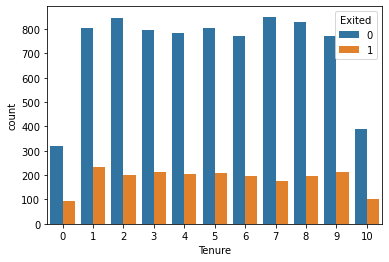

In [232]:
ax_tenure = sns.countplot(x="Tenure", hue="Exited", data=df_new)

# for p in ax_tenure.patches:
#     ax_tenure.annotate(f"\n{p.get_height()}", (p.get_x()+0.25, p.get_height()+40), ha='center', va='top', color='black', size=10)

Balance

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

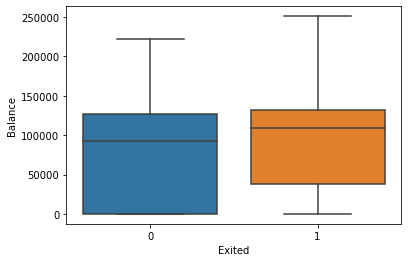

In [152]:
sns.boxplot(x="Exited", y="Balance", data=df_new)

In [295]:
df_new[df_new["Exited"]==0]["Balance"].median()

92072.68

In [296]:
df_new[df_new["Exited"]==1]["Balance"].median()

109349.29

In [280]:
bins = [0, 50000, 100000, 150000, 200000, 260000]

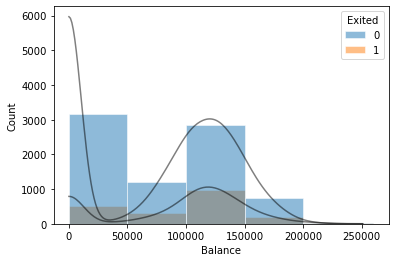

In [281]:
ax = sns.histplot(x="Balance", hue="Exited", data=df_new, bins=bins, kde=True, stat='count', alpha=0.5, edgecolor='white', linewidth=0.5,
             line_kws=dict(color='black', alpha=0.5, linewidth=1.5))

ax.get_lines()[0].set_color('black')
ax.get_lines()[1].set_color('black')

In [282]:
for p in ax.patches:
    print(p.get_x(), p.get_height())

0.0 526
50000.0 300
100000.0 987
150000.0 205
200000.0 19
0.0 3166
50000.0 1209
100000.0 2843
150000.0 730
200000.0 15


In [298]:
print(sum(df_new[df_new["Balance"]<50000]["Exited"].value_counts()))
df_new[df_new["Balance"]<50000]["Exited"].value_counts()

3692


0    3166
1     526
Name: Exited, dtype: int64

In [290]:
df_new[df_new["Balance"]<50000]["Exited"].value_counts(normalize=True)

0    0.85753
1    0.14247
Name: Exited, dtype: float64

In [299]:
print(sum(df_new[(df_new["Balance"]>=50000) & (df_new["Balance"]<100000)]["Exited"].value_counts()))
df_new[(df_new["Balance"]>=50000) & (df_new["Balance"]<100000)]["Exited"].value_counts()

1509


0    1209
1     300
Name: Exited, dtype: int64

In [284]:
df_new[(df_new["Balance"]>=50000) & (df_new["Balance"]<100000)]["Exited"].value_counts(normalize=True)

0    0.801193
1    0.198807
Name: Exited, dtype: float64

In [300]:
print(sum(df_new[(df_new["Balance"]>100000) & (df_new["Balance"]<150000)]["Exited"].value_counts()))
df_new[(df_new["Balance"]>100000) & (df_new["Balance"]<150000)]["Exited"].value_counts()

3830


0    2843
1     987
Name: Exited, dtype: int64

In [285]:
df_new[(df_new["Balance"]>100000) & (df_new["Balance"]<150000)]["Exited"].value_counts(normalize=True)

0    0.742298
1    0.257702
Name: Exited, dtype: float64

In [301]:
print(sum(df_new[(df_new["Balance"]>150000) & (df_new["Balance"]<200000)]["Exited"].value_counts()))
df_new[(df_new["Balance"]>150000) & (df_new["Balance"]<200000)]["Exited"].value_counts()

935


0    730
1    205
Name: Exited, dtype: int64

In [286]:
df_new[(df_new["Balance"]>150000) & (df_new["Balance"]<200000)]["Exited"].value_counts(normalize=True)

0    0.780749
1    0.219251
Name: Exited, dtype: float64

In [289]:
df_new[(df_new["Balance"]>200000)]["Exited"].value_counts()

1    19
0    15
Name: Exited, dtype: int64

In [288]:
df_new[(df_new["Balance"]>200000)]["Exited"].value_counts(normalize=True)

1    0.558824
0    0.441176
Name: Exited, dtype: float64

NumOfProducts

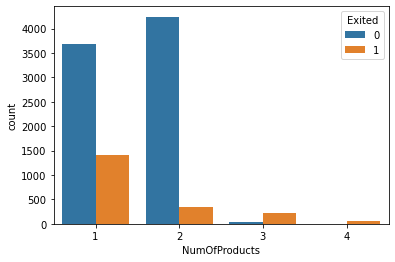

In [304]:
ax_product = sns.countplot(x="NumOfProducts", hue="Exited", data=df_new)
plt.legend(loc="upper right", title="Exited")
# for p in ax_product.patches:
#         ax_product.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()+220), ha='center', va='top', color='black', size=12)


In [335]:
df_new[(df_new["Exited"]==1) & (df_new["NumOfProducts"]==3)]["Balance"].median()

106655.515

In [336]:
df_new[(df_new["Exited"]==0) & (df_new["NumOfProducts"]==3)]["Balance"].median()

0.0

In [337]:
df_new[(df_new["Exited"]==1) & (df_new["NumOfProducts"]==1)]["Balance"].median()

110022.74

In [338]:
df_new[(df_new["Exited"]==0) & (df_new["NumOfProducts"]==1)]["Balance"].median()

112689.95

In [339]:
df_new[(df_new["Exited"]==1) & (df_new["NumOfProducts"]==2)]["Balance"].median()

109006.295

In [340]:
df_new[(df_new["Exited"]==0) & (df_new["NumOfProducts"]==2)]["Balance"].median()

0.0

In [341]:
df_new[(df_new["Exited"]==1) & (df_new["NumOfProducts"]==4)]["Balance"].median()

116808.195

In [179]:
df_new["NumOfProducts"].value_counts()/10000

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

In [220]:
df_new.groupby(["NumOfProducts"])["Exited"].value_counts()

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              1          220
               0           46
4              1           60
Name: Exited, dtype: int64

In [221]:
df_new.groupby(["NumOfProducts"])["Exited"].value_counts(normalize=True)

NumOfProducts  Exited
1              0         0.722856
               1         0.277144
2              0         0.924183
               1         0.075817
3              1         0.827068
               0         0.172932
4              1         1.000000
Name: Exited, dtype: float64

使用三種以上的金融商品的顧客，更傾向取消服務，使用兩種金融商品的顧客，會繼續穩定使用，使用一種金融商品的顧客，取消服務的比例也偏高

HasCrCard

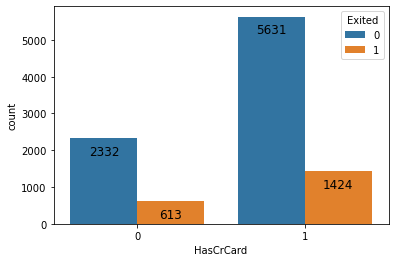

In [166]:
ax_card = sns.countplot(x="HasCrCard", hue="Exited", data=df_new)

for p in ax_card.patches:
        ax_card.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()+220), ha='center', va='top', color='black', size=12)

In [305]:
df_new.groupby(["HasCrCard"])["Exited"].value_counts()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

In [306]:
df_new.groupby(["HasCrCard"])["Exited"].value_counts(normalize=True)

HasCrCard  Exited
0          0         0.791851
           1         0.208149
1          0         0.798157
           1         0.201843
Name: Exited, dtype: float64

IsActiveMember

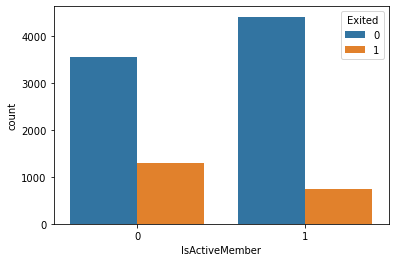

In [309]:
ax_active = sns.countplot(x="IsActiveMember", hue="Exited", data=df_new)

# for p in ax_active.patches:
#         ax_active.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()+220), ha='center', va='top', color='black', size=12)

In [307]:
df_new.groupby(["IsActiveMember"])["Exited"].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

In [308]:
df_new.groupby(["IsActiveMember"])["Exited"].value_counts(normalize=True)

IsActiveMember  Exited
0               0         0.731491
                1         0.268509
1               0         0.857309
                1         0.142691
Name: Exited, dtype: float64

非活躍的顧客，會更傾向於取消服務

EstimatedSalary

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

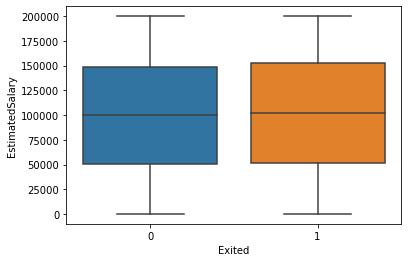

In [168]:
sns.boxplot(x="Exited", y="EstimatedSalary", data=df_new)

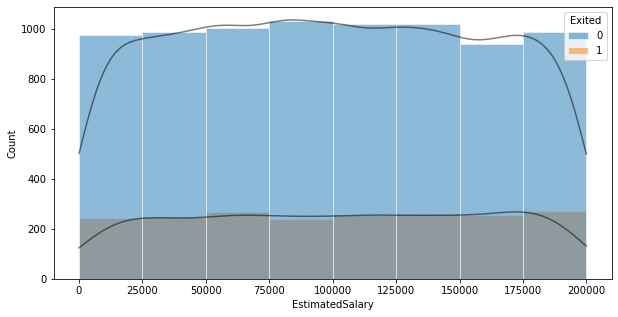

In [171]:
plt.figure(figsize=(10, 5))

ax = sns.histplot(x="EstimatedSalary", hue="Exited", data=df_new, bins=8, kde=True, stat='count', alpha=0.5, edgecolor='white', linewidth=0.5,
             line_kws=dict(color='black', alpha=0.5, linewidth=1.5))

ax.get_lines()[0].set_color('black')
ax.get_lines()[1].set_color('black')

在收入方面，與取消服務的顧客沒有太大關係

geography, age, NumOfProducts, IsActiveMember跟取消服務有關係